## K Nearest Neighbors  

I have been given a classified data set from a company. They've hidden the feature column names but have given you the data and the target classes. 

I try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### Data Expolaration

I use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column

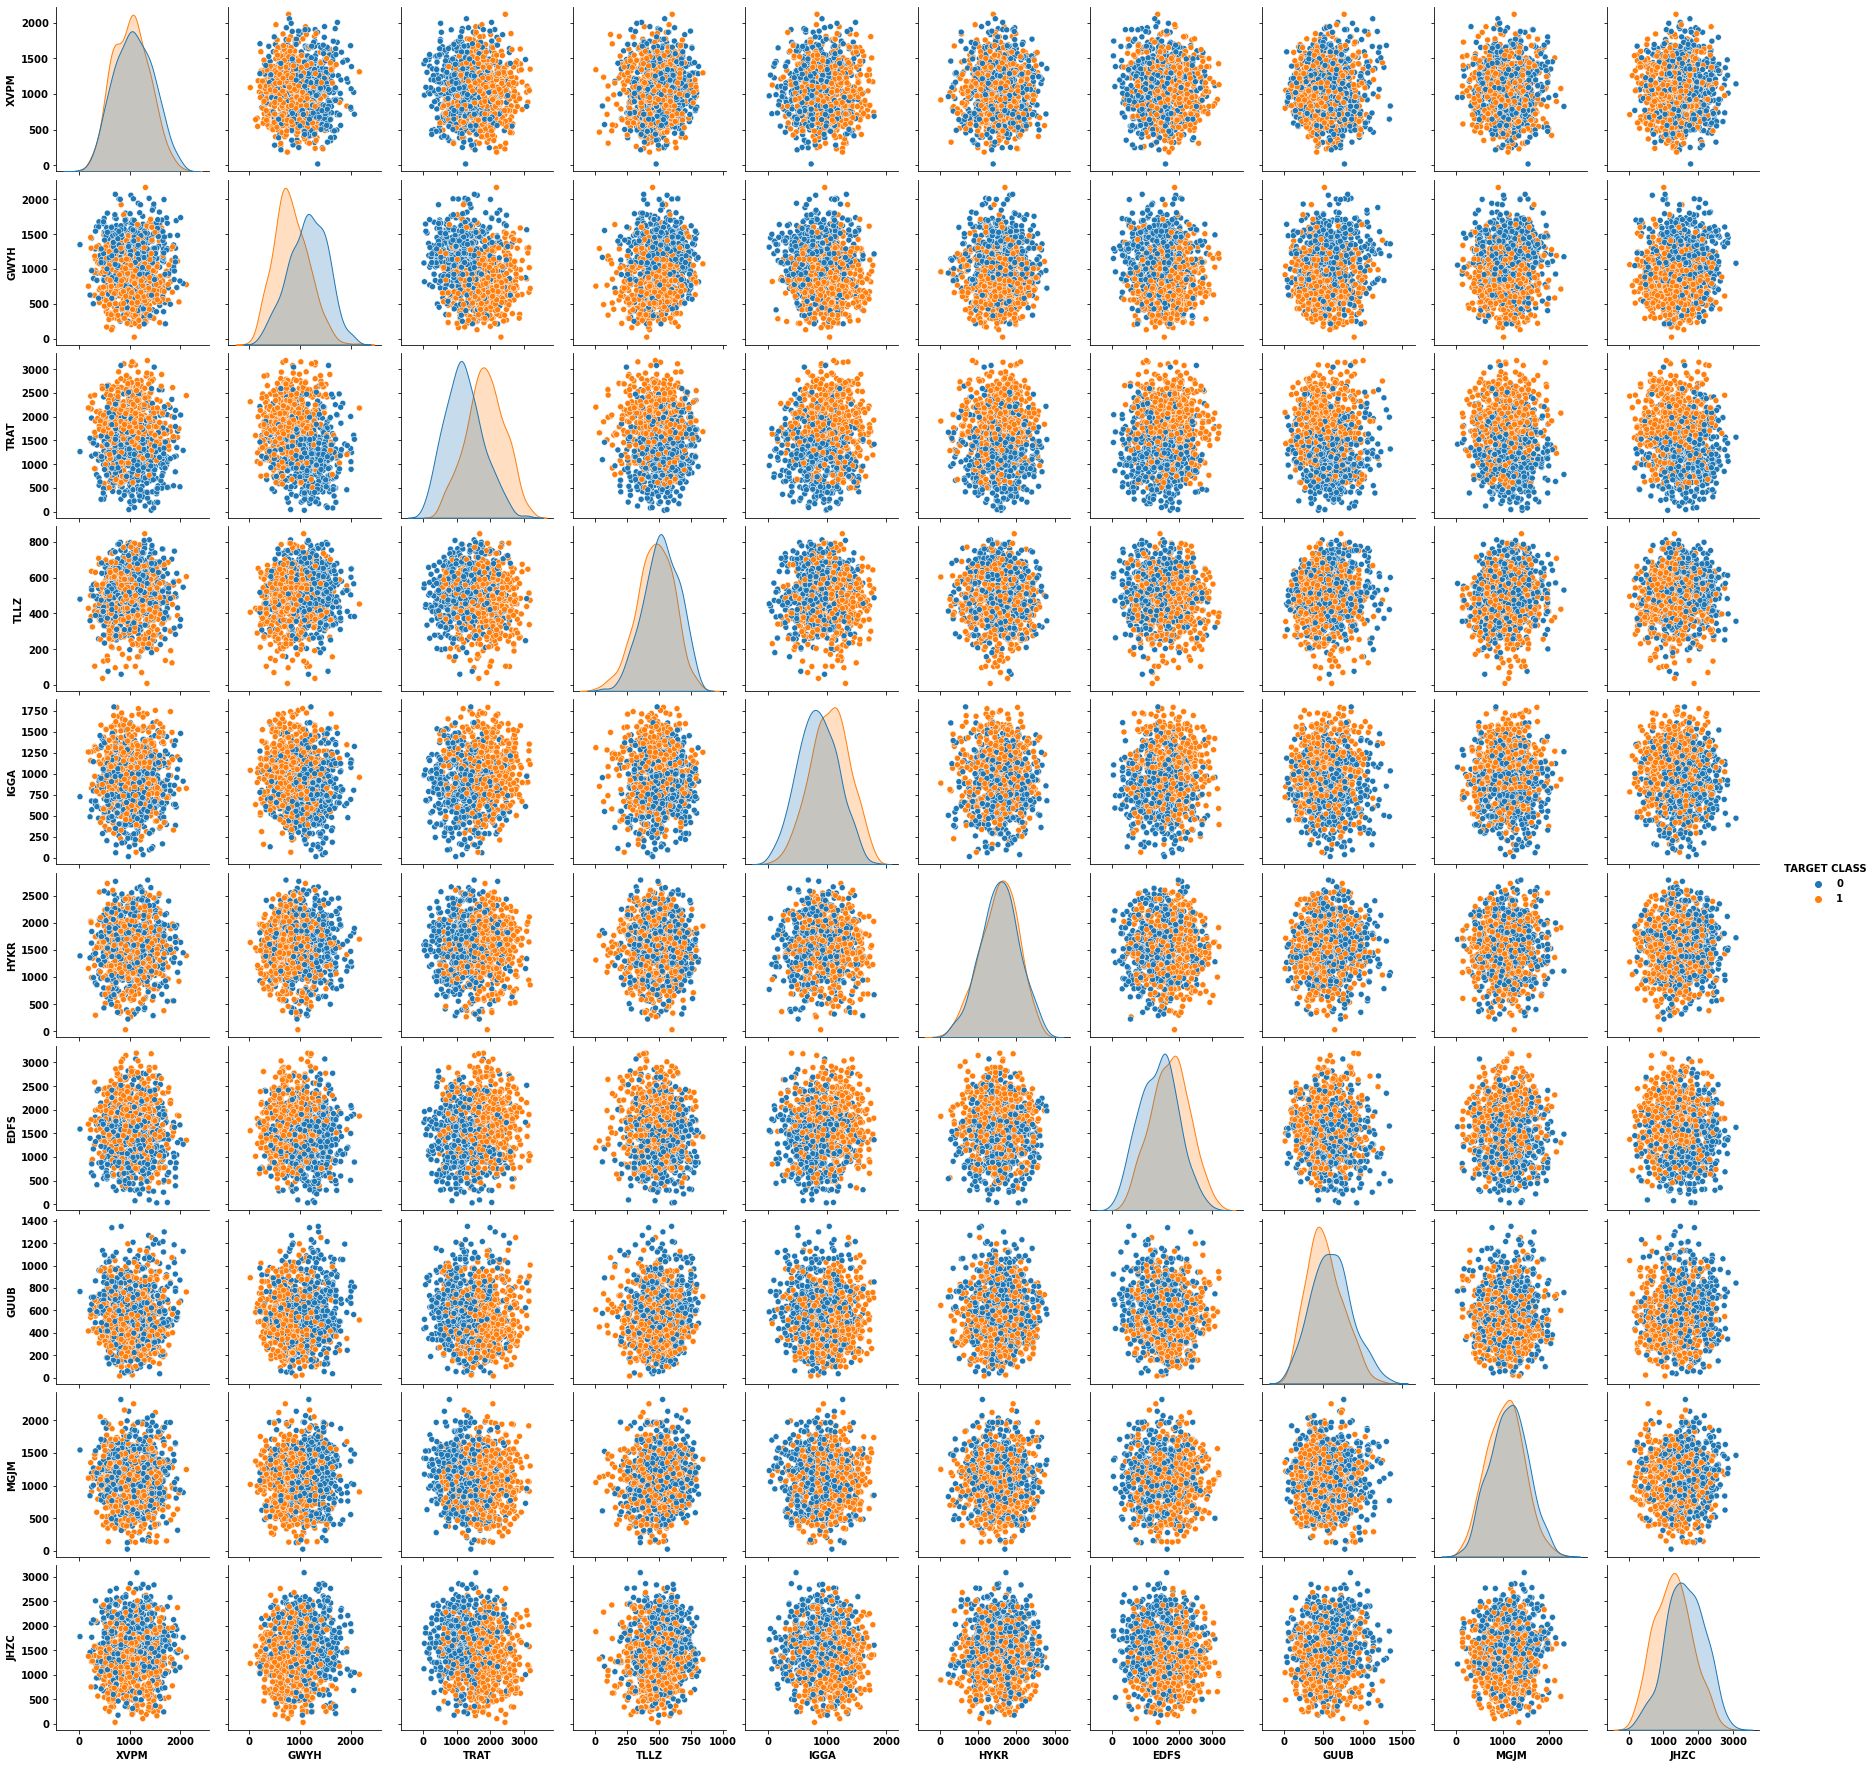

In [5]:
sns.pairplot(df, hue = 'TARGET CLASS')

There are indeed some feature effective on the target class. The accumulation of target class is changing across some of the feature and so the feature are important.

### Standardize the Variables


In [13]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis = 1))
scal_feature = scaler.transform (df.drop('TARGET CLASS', axis = 1))
scaled_feature = pd.DataFrame(scal_feature, columns=df.columns[:-1])

In [14]:
scaled_feature

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


### Train Test Split

I use train_test_split to split your data into a training set and a testing set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature, df ['TARGET CLASS'] , test_size=0.4, random_state=101)

### Using KNN

In [18]:
KNN = KNeighborsClassifier(n_neighbors=1)
# for now we make the neighobors number to one

In [20]:
KNN.fit(X_train, y_train)
predict = KNN.predict(X_test)

### Evaluations

In [22]:
print (classification_report(y_test, predict))
print (confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       199
           1       0.71      0.72      0.71       201

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

[[141  58]
 [ 57 144]]


### Optimize a K Value
Let's go ahead and use the elbow method to pick a good K Value!


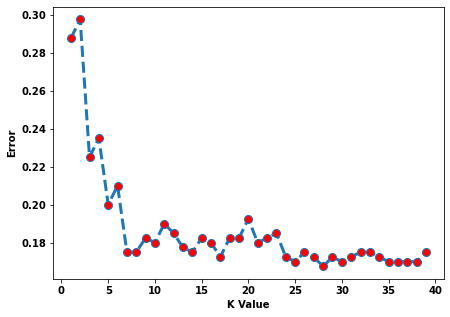

In [33]:
error = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    predict = KNN.predict(X_test)
    error.append (np.mean(y_test != predict))

plt.figure(figsize=(7,5))    
plt.plot(range(1,40),error, ls = '--', marker = 'o', markerfacecolor = 'red', markersize = 8, lw=3)
plt.ylabel('Error');
plt.xlabel('K Value');

It seems that k value around 17 should be fine; while it does not have the best error, it is not too large to be selected for a k value

In [34]:
KNN = KNeighborsClassifier(n_neighbors=17)
KNN.fit(X_train, y_train)
predict = KNN.predict(X_test)
error.append (np.mean(y_test != predict))
print (classification_report(y_test, predict))
print (confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       199
           1       0.81      0.85      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

[[160  39]
 [ 30 171]]
